# IMPORTING IMPORTANT LIB

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import  seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error
import joblib




import warnings
warnings.filterwarnings('ignore')

# LODING THE DATA

In [ ]:
data=pd.read_csv(r'C:\Users\VICTUS\OneDrive\Desktop\project\model\dataset\Cellphone.csv')
data.head(  )

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# EAD AND CLEANING 

In [3]:
print(data.info())

print(data.isna().sum())


data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB
None
Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
interna

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [4]:
n_duplicates=data.duplicated().sum()
print(f"this data contane {n_duplicates}")

this data contane 0


In [5]:
data.drop(['Product_id'],axis=1,inplace=True)

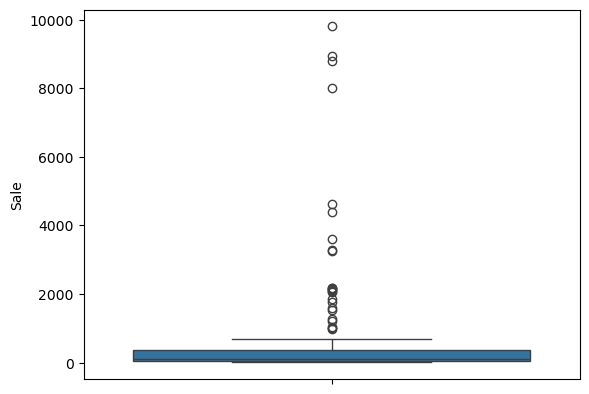

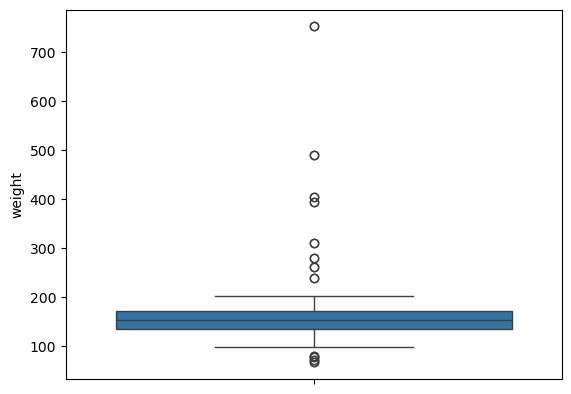

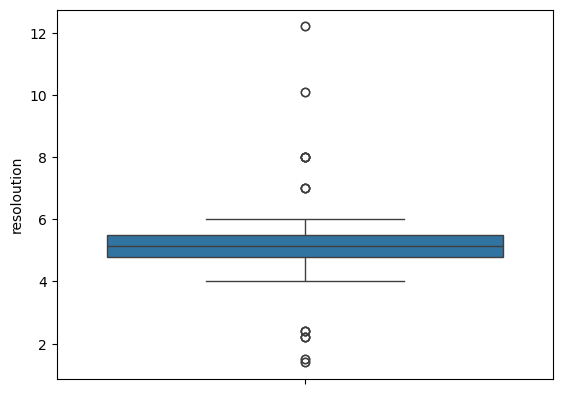

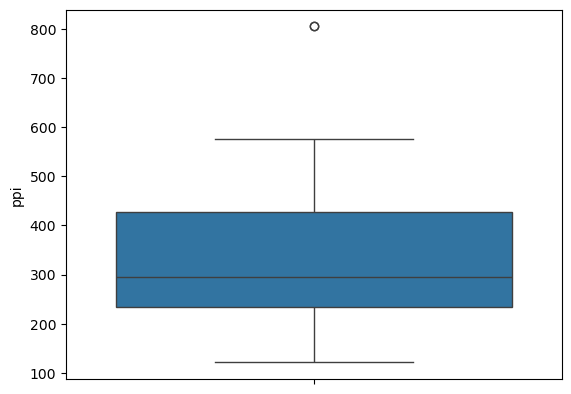

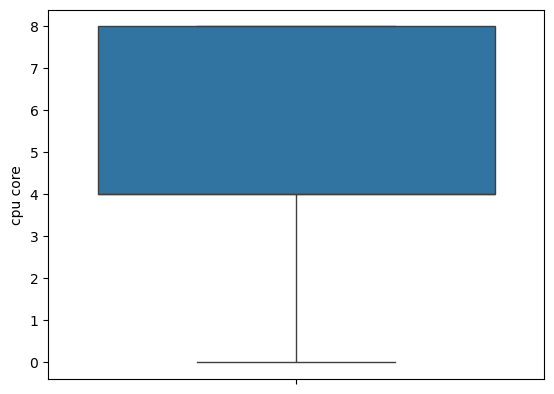

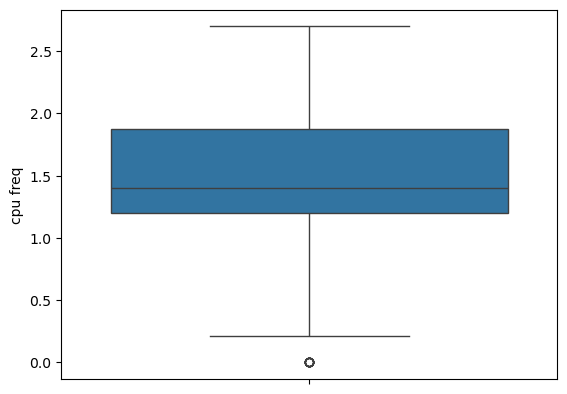

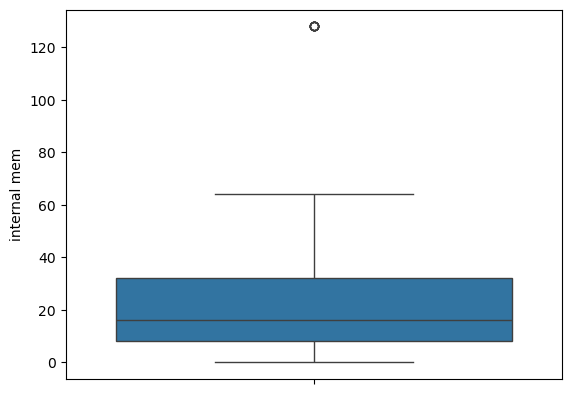

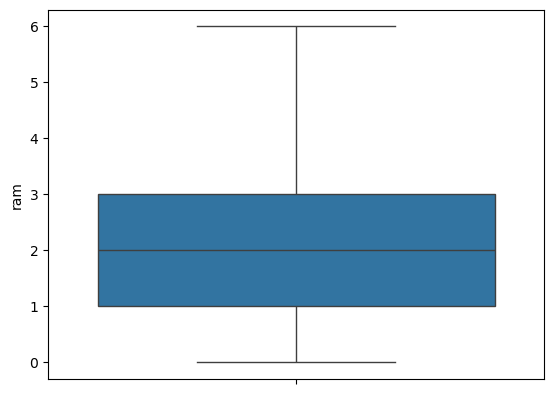

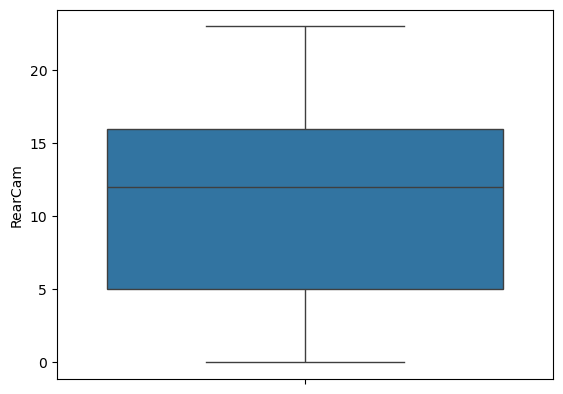

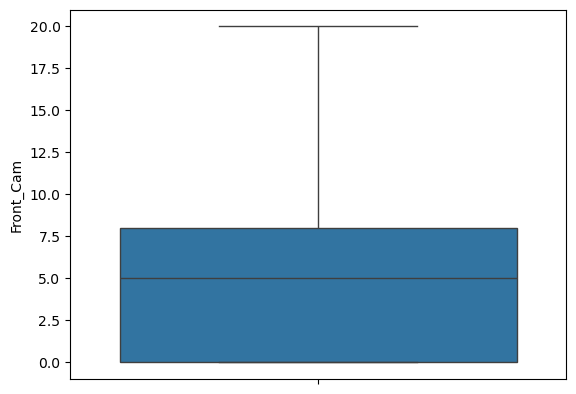

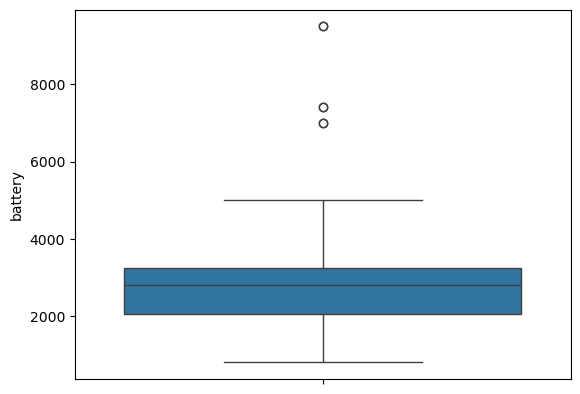

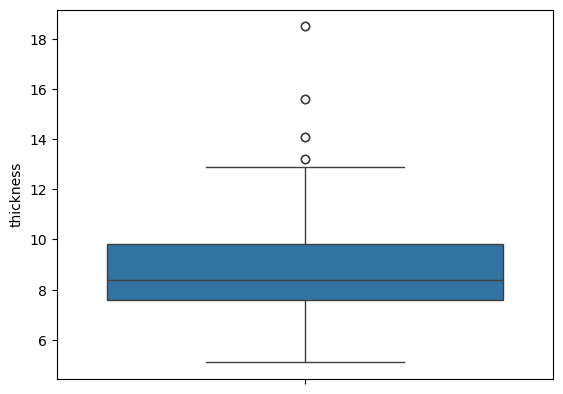

In [6]:
for col in data.drop(['Price'],axis=1).columns:
    sns.boxplot(data[col])
    plt.show()
    

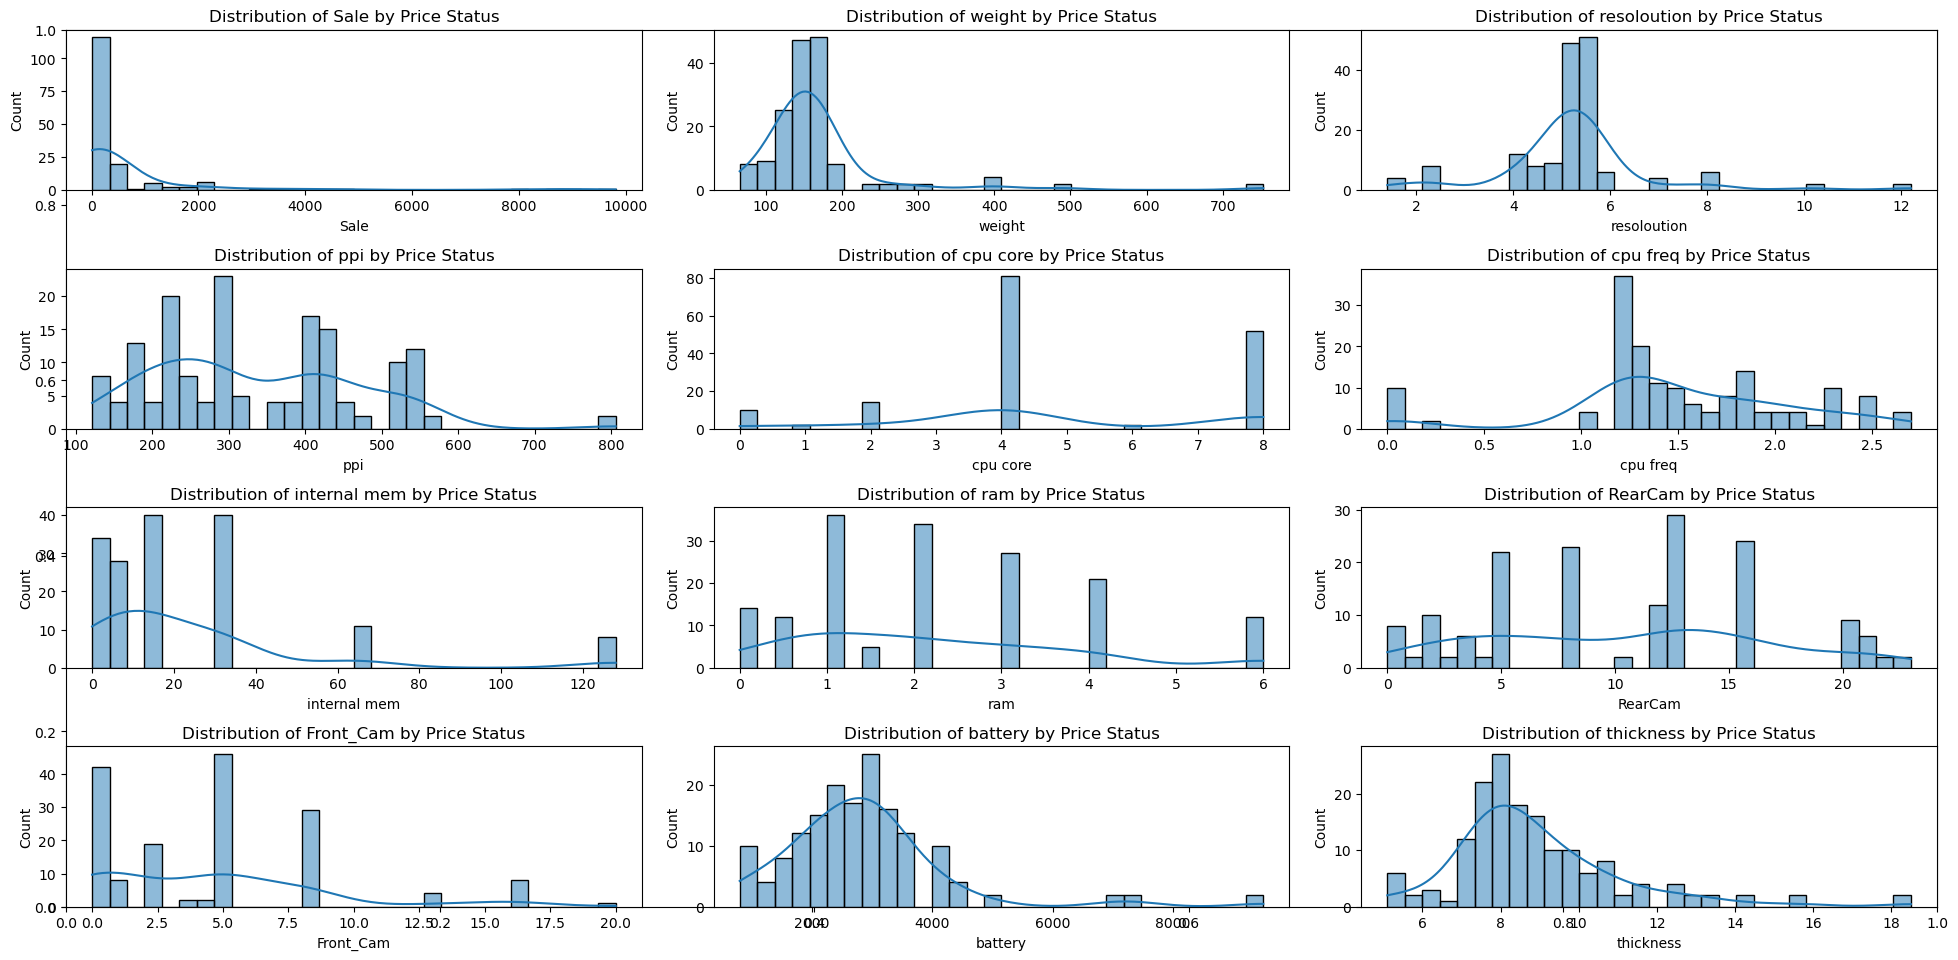

In [7]:
plt.subplots(figsize=(20,10))
for i ,column in enumerate(data.drop('Price',axis=1)):
    plt.subplot(4,3, i+1)
    sns.histplot(data=data, x=column, kde=True, palette='viridis', bins=30)
    plt.title(f"Distribution of {column} by Price Status")
    plt.xlabel(column)
    plt.ylabel("Count")  
plt.tight_layout()
plt.show()

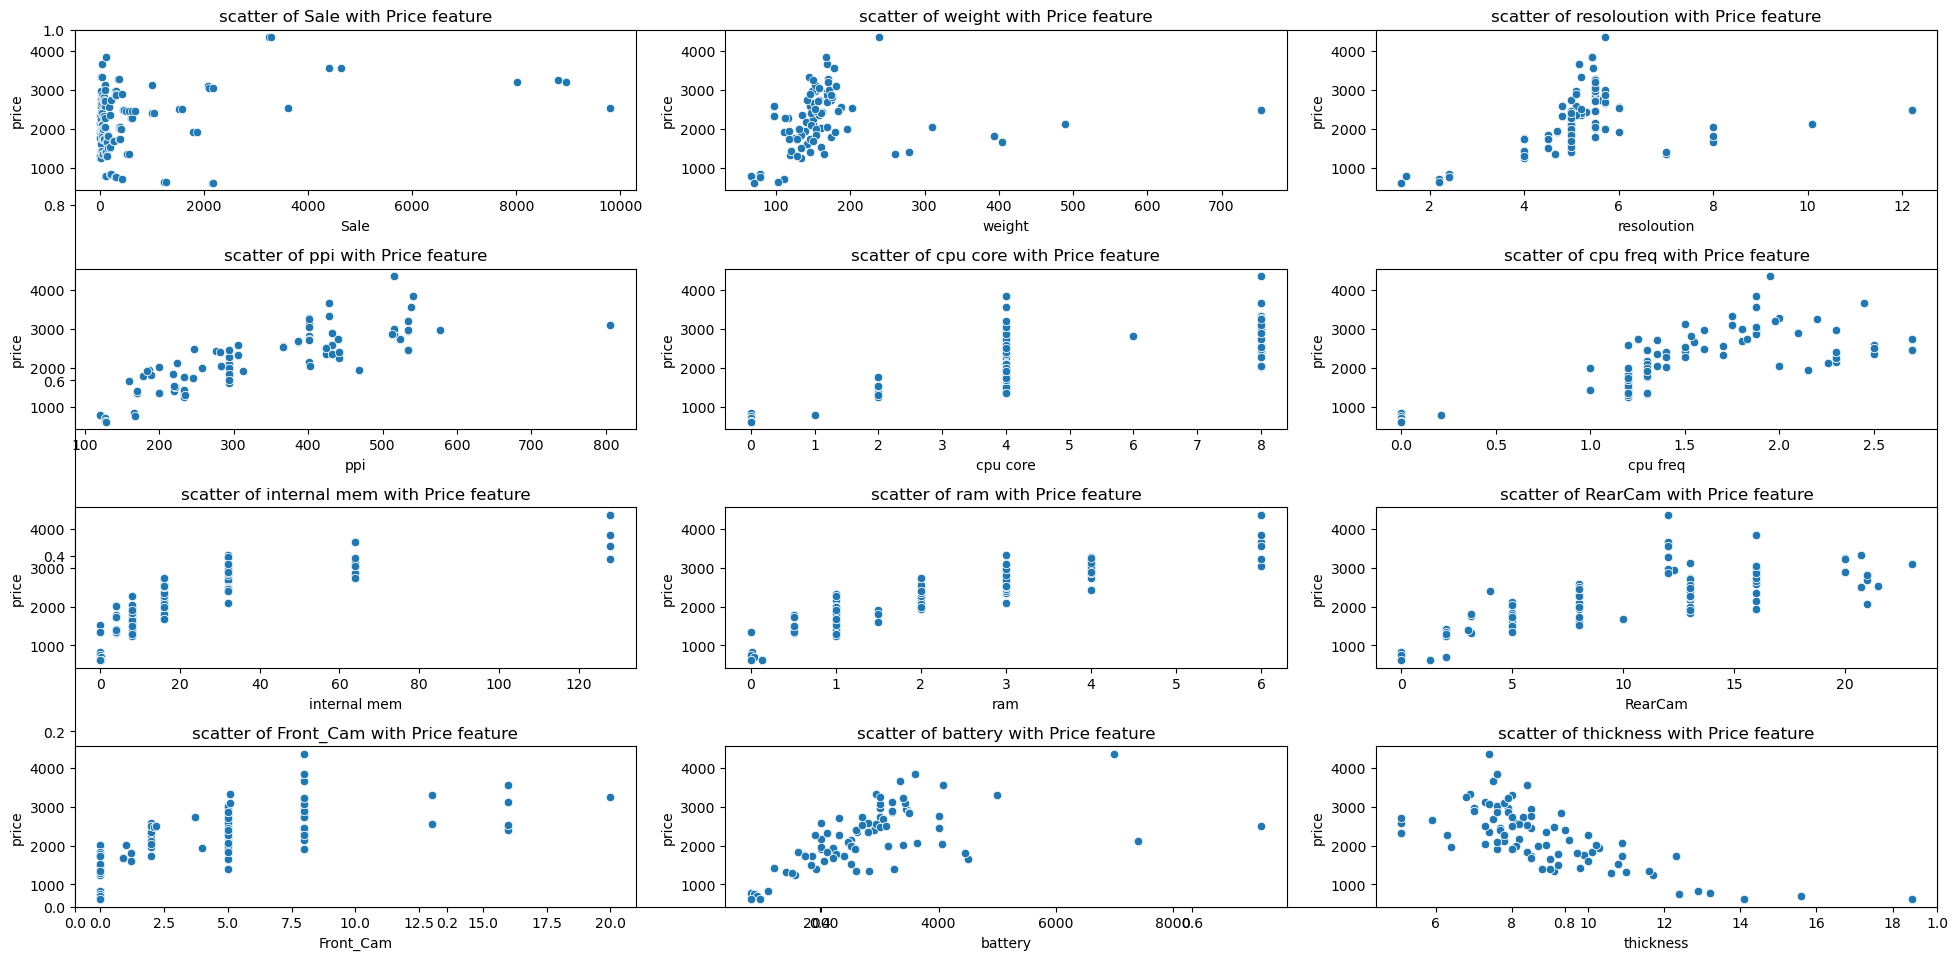

In [8]:
plt.subplots(figsize=(20,10))
for i ,column in enumerate(data.drop('Price',axis=1)):
    plt.subplot(4,3, i+1)
    sns.scatterplot(data=data, x=column,y=data['Price'], palette='viridis')
    plt.title(f"scatter of {column} with Price feature")
    plt.xlabel(column)
    plt.ylabel("price")  
plt.tight_layout()
plt.show()

In [9]:
outlaiers=['Sale','weight']

In [10]:
def outlaier(data,col):
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound=Q3+1.5*IQR
    data = data[((data[col] < lower_bound) | (data[col] >upper_bound))]
    return data

# SCALING AND SPLITING

In [12]:
X=data.drop('Price',axis=1)
y=data['Price']

In [13]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=71)

# MODELING

In [37]:
rf=RandomForestRegressor(n_estimators=300)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300)

# TEST 

In [38]:
rf.score(X_train,y_train)

0.9958194299111908

In [39]:
rf.score(X_test,y_test)

0.9559987118182959

In [40]:
y_train_predicted=rf.predict(X_train)
y_test_predicted=rf.predict(X_test)

In [41]:
print(mean_absolute_error(y_train,y_train_predicted))

36.973671875


In [42]:
print(mean_squared_error(y_train,y_train_predicted))

2602.771002690972


In [19]:
pd.DataFrame({"real X":y_train,"predict":y_train_predicted})

,real X,predict
56,3658,3317.980959
137,3116,3076.861036
5,2137,2199.788582
28,1390,1700.483966
47,3316,2955.447625
...,...,...
157,3211,3591.249956
40,2124,2226.857478
55,1777,1688.688667
11,2006,1902.919167


In [21]:
pd.DataFrame({"real X":y_test,"predict":y_test_predicted})

,real X,predict
110,754,865.338848
34,1421,1209.043113
53,3658,3317.980959
119,1734,1668.783645
134,2266,2090.704527
103,2343,2372.383331
146,3102,2918.818000
129,2466,2566.032609
142,2508,2628.507561
120,1734,1668.783645


# DUMPING MODEL 

In [22]:
joblib.dump(rf,"random.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

# -------------------------------